<a href="https://colab.research.google.com/github/imhyunho99/2023-1--MachineLearning/blob/main/20_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lib and Data download

In [ ]:
from tensorflow import keras

In [ ]:
from tensorflow.keras.datasets import imdb
(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=500) #num_words = dict size

17464789/17464789 [==============================] - 0s 0us/step


In [ ]:
print(train_input.shape, test_input.shape)

(25000,) (25000,)


In [ ]:
print(len(train_input[0]))

218


In [ ]:
print(train_input[0])

[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


In [ ]:
print(len(train_input[0]))
print(len(train_input[1]))
print(len(train_input[2]))

259
520
290


In [ ]:
print(train_target[:20])

[1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1]


In [ ]:
from sklearn.model_selection import train_test_split
train_input, val_input, train_target, val_target =\
 train_test_split(train_input, train_target, test_size=0.2, random_state=42)

In [ ]:
import numpy as np
lengths = np.array([len(x) for x in train_input])

In [ ]:
print(np.mean(lengths), np.median(lengths))

239.00925 178.0


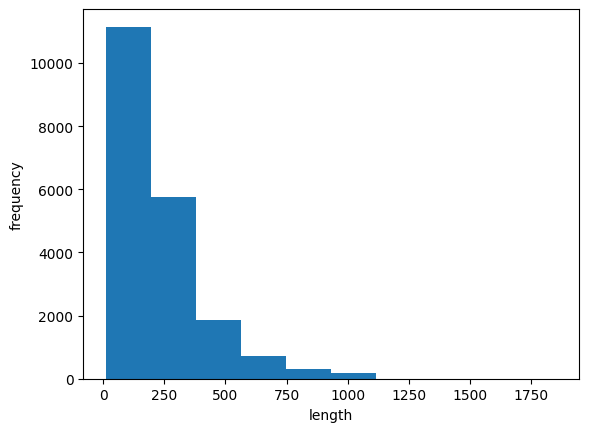

In [ ]:
import matplotlib.pyplot as plt
plt.hist(lengths)
plt.xlabel('length')
plt.ylabel('frequency')
plt.show()

Preprocessing

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input, maxlen=50) #padding은 앞단에

In [ ]:
print(train_seq.shape)

(20000, 50)


In [ ]:
print(train_seq[0])

[142  73 237   6   2   7   2   2 188   2 103  14  31  10  10 451   7   2
   5   2  80  91   2  30   2  34  14  20 151  50  26 131  49   2  84  46
  50  37  80  79   6   2  46   7  14  20  10  10 470 158]


In [ ]:
print(train_input[0][-10:])

[6, 2, 46, 7, 14, 20, 10, 10, 470, 158]


In [ ]:
print(train_seq[[24]])

[[  2   2  15   9  51  13  62   2 276  46  34   2   2   5   2   2  13  62
    2  14   8  24  28   2   2  11  12   4   2  92  60   2   4  20  11  91
    2  17  12 186   2 303   5   4  20   2  46  11 111   2]]


In [ ]:
train_oh = keras.utils.to_categorical(train_seq) #ont hot encoding

In [ ]:
print(train_oh.shape) #500차원 

(20000, 50, 500)


In [ ]:
print(train_oh[0][0][:12])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
val_seq = pad_sequences(val_input, maxlen=50)

In [ ]:
val_oh = keras.utils.to_categorical(val_seq)

In [ ]:
model = keras.Sequential()
model.add(keras.layers.SimpleRNN(8, input_shape=(50, 500)))
model.add(keras.layers.Dense(1, activation = 'sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 8)                 4072      
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 4,081
Trainable params: 4,081
Non-trainable params: 0
_________________________________________________________________


In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4) #cnn보다 rnn의 rl초기 값이 더 작음, 그래야 학습이 잘됨
model.compile(optimizer=rmsprop, loss='binary_crossentropy',
              metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best_simplernn-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model.fit(train_oh, train_target, epochs=10, batch_size=256, validation_data=(val_oh, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/10
79/79 [==============================] - 11s 69ms/step - loss: 0.6946 - accuracy: 0.5269 - val_loss: 0.6929 - val_accuracy: 0.5328
Epoch 2/10
79/79 [==============================] - 5s 66ms/step - loss: 0.6868 - accuracy: 0.5465 - val_loss: 0.6863 - val_accuracy: 0.5528
Epoch 3/10
79/79 [==============================] - 4s 56ms/step - loss: 0.6793 - accuracy: 0.5703 - val_loss: 0.6798 - val_accuracy: 0.5672
Epoch 4/10
79/79 [==============================] - 4s 53ms/step - loss: 0.6725 - accuracy: 0.5888 - val_loss: 0.6738 - val_accuracy: 0.5822
Epoch 5/10
79/79 [==============================] - 5s 65ms/step - loss: 0.6659 - accuracy: 0.6015 - val_loss: 0.6681 - val_accuracy: 0.5930
Epoch 6/10
79/79 [==============================] - 4s 51ms/step - loss: 0.6587 - accuracy: 0.6133 - val_loss: 0.6612 - val_accuracy: 0.6028
Epoch 7/10
79/79 [==============================] - 4s 51ms/step - loss: 0.6510 - accuracy: 0.6270 - val_loss: 0.6556 - val_accuracy: 0.6150
Epoch 8/10
7

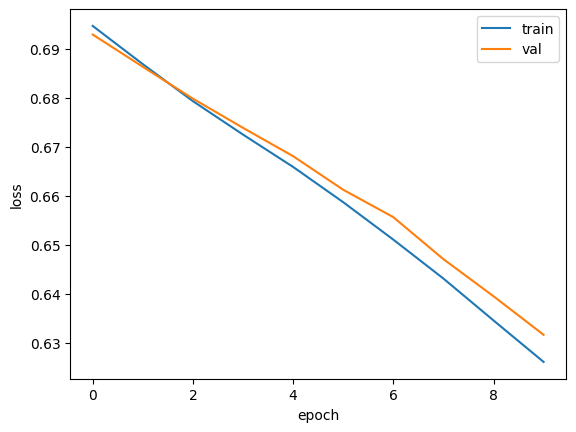

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [ ]:
print(train_seq.nbytes, train_oh.nbytes)

4000000 2000000000


Word Embedding

In [ ]:
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500, 16, input_length=50)) #one hot encoding 대신 word embedding 해주고 rnn에 넘겨주기
model2.add(keras.layers.SimpleRNN(8))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

In [ ]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 16)            8000      
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 8)                 200       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8,209
Trainable params: 8,209
Non-trainable params: 0
_________________________________________________________________


In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy',
              metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-embedding-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model2.fit(train_seq, train_target, epochs=10, batch_size=256, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])


Epoch 1/10
79/79 [==============================] - 8s 77ms/step - loss: 0.6974 - accuracy: 0.5012 - val_loss: 0.6926 - val_accuracy: 0.5200
Epoch 2/10
79/79 [==============================] - 5s 69ms/step - loss: 0.6942 - accuracy: 0.5125 - val_loss: 0.6914 - val_accuracy: 0.5278
Epoch 3/10
79/79 [==============================] - 4s 51ms/step - loss: 0.6918 - accuracy: 0.5257 - val_loss: 0.6900 - val_accuracy: 0.5340
Epoch 4/10
79/79 [==============================] - 4s 53ms/step - loss: 0.6895 - accuracy: 0.5357 - val_loss: 0.6885 - val_accuracy: 0.5446
Epoch 5/10
79/79 [==============================] - 5s 69ms/step - loss: 0.6871 - accuracy: 0.5488 - val_loss: 0.6868 - val_accuracy: 0.5522
Epoch 6/10
79/79 [==============================] - 4s 53ms/step - loss: 0.6845 - accuracy: 0.5617 - val_loss: 0.6847 - val_accuracy: 0.5526
Epoch 7/10
79/79 [==============================] - 4s 55ms/step - loss: 0.6813 - accuracy: 0.5708 - val_loss: 0.6818 - val_accuracy: 0.5596
Epoch 8/10
79

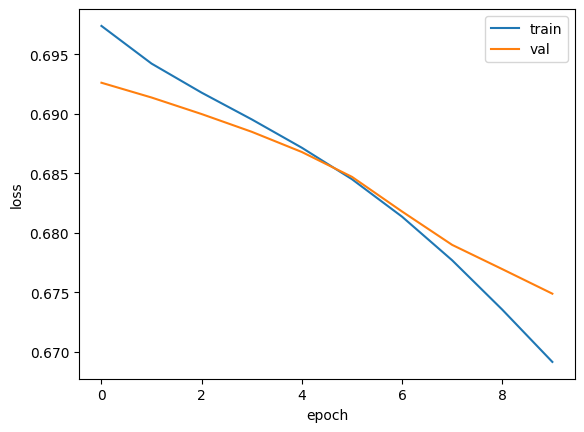

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()